In [1]:
import csv
import pandas as pd
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
mpl.rc('axes', unicode_minus=False)
%matplotlib inline
plt.style.use('ggplot')


data_path = os.getenv('HOME') + '/aiffel_training/codingMaster/covid_kaggle/'

# Weather.csv

In [2]:
weather = pd.read_csv(data_path + "Weather.csv")

weather_seoul = weather[weather['province'] == 'Seoul']
weather_date = weather_seoul[ weather_seoul['date'] >= '2020-01-20']
# weather_date = weather_date[weather_date['date'] < '2020-06-30']

weather_date = weather_date[['date', 'province', 'avg_temp', 'precipitation', 'max_wind_speed']] # 평균 기온, 강수량, 최대풍속 데이터만 남김

weather_date.head()

date province  avg_temp  precipitation  max_wind_speed
23679  2020-01-20    Seoul       0.7            0.0             5.7
23695  2020-01-21    Seoul      -0.4            0.0             3.5
23711  2020-01-22    Seoul       3.0            0.0             3.2
23727  2020-01-23    Seoul       4.6            0.0             4.7
23743  2020-01-24    Seoul       2.8            0.0             3.7

In [3]:
weather_merge = weather_date[['date','avg_temp','precipitation', 'max_wind_speed']]
weather_merge.set_index('date', inplace =True)
weather_merge

avg_temp  precipitation  max_wind_speed
date                                               
2020-01-20       0.7            0.0             5.7
2020-01-21      -0.4            0.0             3.5
2020-01-22       3.0            0.0             3.2
2020-01-23       4.6            0.0             4.7
2020-01-24       2.8            0.0             3.7
...              ...            ...             ...
2020-06-25      21.6           13.3             4.3
2020-06-26      21.8            2.1             5.3
2020-06-27      24.1            0.0             5.4
2020-06-28      25.2            0.0             4.7
2020-06-29      23.8           11.9             5.9

[162 rows x 3 columns]

# TimeProvince.csv

In [4]:
timeprovince = pd.read_csv(data_path + "TimeProvince.csv")

timeprovince_weather = timeprovince[timeprovince['province'] == 'Seoul']
timeprovince_weather = timeprovince_weather[timeprovince_weather['date'] < '2020-06-30']

timeprovince_weather.head(10)

date  time province  confirmed  released  deceased  date_confirmed
0    2020-01-20    16    Seoul          0         0         0               0
17   2020-01-21    16    Seoul          0         0         0               0
34   2020-01-22    16    Seoul          0         0         0               0
51   2020-01-23    16    Seoul          0         0         0               0
68   2020-01-24    16    Seoul          0         0         0               0
85   2020-01-25    16    Seoul          0         0         0               0
102  2020-01-26    16    Seoul          0         0         0               0
119  2020-01-27    16    Seoul          1         0         0               1
136  2020-01-28    16    Seoul          1         0         0               0
153  2020-01-29    16    Seoul          1         0         0               0

In [5]:
timeprovince_merge = timeprovince_weather[['date','date_confirmed']]
timeprovince_merge.set_index('date', inplace =True)
timeprovince_merge

date_confirmed
date                      
2020-01-20               0
2020-01-21               0
2020-01-22               0
2020-01-23               0
2020-01-24               0
...                    ...
2020-06-25               9
2020-06-26              17
2020-06-27              17
2020-06-28              14
2020-06-29               7

[162 rows x 1 columns]

In [6]:
len(weather_merge.index)

162

In [7]:
len(timeprovince_merge.index)

162

In [8]:
# print(weather_merge.index == timeprovince_merge.index)

In [9]:
merge = pd.merge(weather_merge, timeprovince_merge, left_index=True, right_index=True)
merge

avg_temp  precipitation  max_wind_speed  date_confirmed
date                                                               
2020-01-20       0.7            0.0             5.7               0
2020-01-21      -0.4            0.0             3.5               0
2020-01-22       3.0            0.0             3.2               0
2020-01-23       4.6            0.0             4.7               0
2020-01-24       2.8            0.0             3.7               0
...              ...            ...             ...             ...
2020-06-25      21.6           13.3             4.3               9
2020-06-26      21.8            2.1             5.3              17
2020-06-27      24.1            0.0             5.4              17
2020-06-28      25.2            0.0             4.7              14
2020-06-29      23.8           11.9             5.9               7

[162 rows x 4 columns]

# 데이터 분석 
## Wheather.csv
### 기온이 오르면 코로나가 많이 걸리지 않을까? 


In [10]:
temp = [] 
confirmed = [] 
date_list = [] 

for x in weather_date['avg_temp'] : 
    temp.append(x)
for y in timeprovince_weather['date_confirmed'] : 
    confirmed.append(y)
for z in weather_date['date'] : 
    date_list.append(z)
    
print(len(temp))
print(len(confirmed))
print(len(date_list))

162
162
162


In [11]:
merge[['date_confirmed', 'avg_temp']]

date_confirmed  avg_temp
date                                
2020-01-20               0       0.7
2020-01-21               0      -0.4
2020-01-22               0       3.0
2020-01-23               0       4.6
2020-01-24               0       2.8
...                    ...       ...
2020-06-25               9      21.6
2020-06-26              17      21.8
2020-06-27              17      24.1
2020-06-28              14      25.2
2020-06-29               7      23.8

[162 rows x 2 columns]

In [12]:
# import seaborn as sns

# corr = temp[['date_confirmed', 'avg_temp']].corr(method = 'pearson')
# corr

# heatmap = sns.heatmap(corr, 
#                       cbar = True, 
#                       annot = True, 
#                       annot_kws={'size' : 20}, 
#                       fmt = '.2f', 
#                       square = True, 
#                       cmap = 'Blues')

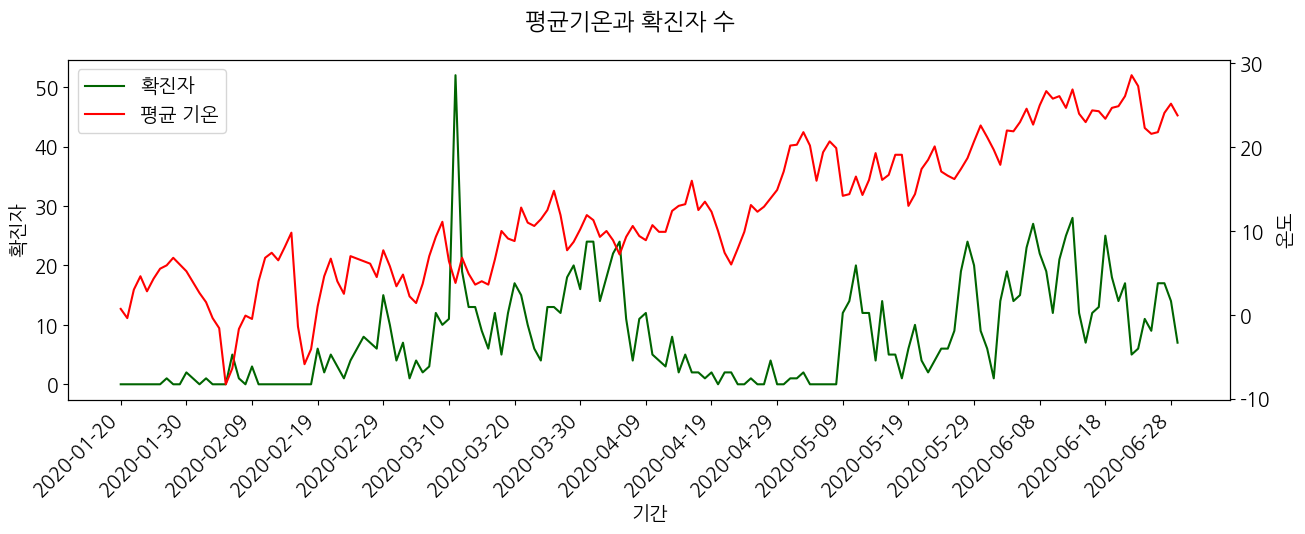

In [13]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14
plt.rc('axes', unicode_minus = False)

fig , ax1 = plt.subplots() 


ax1.set_xlabel('기간')
ax1.set_ylabel('확진자')
line1 = ax1.plot(date_list, confirmed, color='darkgreen', label='확진자')


ax2 = ax1.twinx()
ax2.set_ylabel('온도')
line2 = ax2.plot(date_list, temp, color='red', label='평균 기온')

ax1.set_xticks(np.arange(0,162,10))
fig.autofmt_xdate(rotation=45)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.suptitle('평균기온과 확진자 수')

plt.show() 

### 바람의 세기에 따라 확진자 수가 달라질까?

In [14]:
wind= [] 
con_wind = [] 
date_wind = [] 

for x in weather_date['max_wind_speed'] : 
    wind.append(x)
for y in timeprovince_weather['date_confirmed'] : 
    con_wind.append(y)
for z in weather_date['date'] : 
    date_wind.append(z)


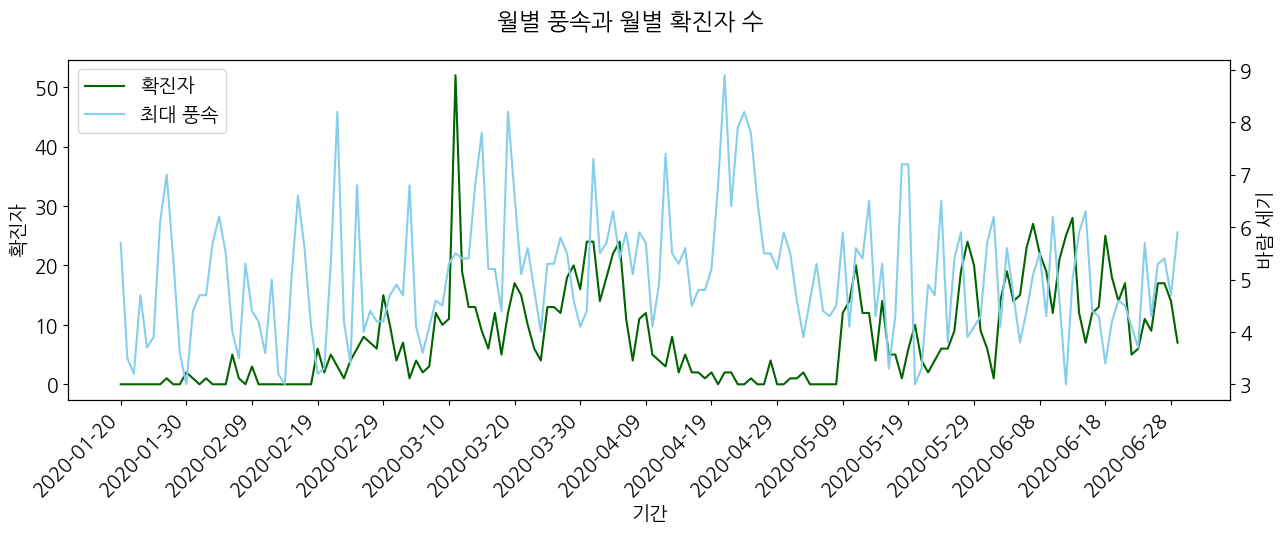

In [15]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14
plt.rc('axes', unicode_minus = False)

fig , ax1 = plt.subplots() 


ax1.set_xlabel('기간')
ax1.set_ylabel('확진자')
line1 = ax1.plot(date_list, con_wind, color='darkgreen', label='확진자')


ax2 = ax1.twinx()
ax2.set_ylabel('바람 세기')
line2 = ax2.plot(date_list, wind, color='skyblue', label='최대 풍속')

ax1.set_xticks(np.arange(0,162,10))
fig.autofmt_xdate(rotation=45)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.suptitle('월별 풍속과 월별 확진자 수')

plt.show() 

### 강수량에 따라 확진자 수가 달라질까? 

In [16]:
precipi= [] 
con_pre = [] 
date_pre = [] 

for x in weather_date['precipitation'] : 
    precipi.append(x)
for y in timeprovince_weather['date_confirmed'] : 
    con_pre.append(y)
for z in weather_date['date'] : 
    date_pre.append(z)
    

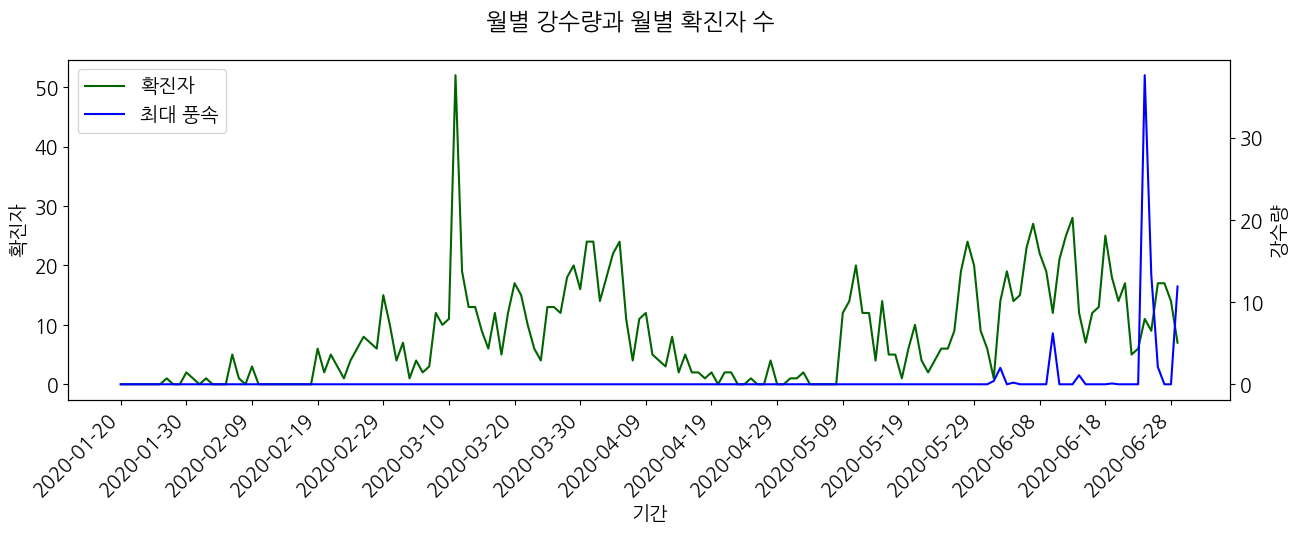

In [17]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14
plt.rc('axes', unicode_minus = False)

fig , ax1 = plt.subplots() 


ax1.set_xlabel('기간')
ax1.set_ylabel('확진자')
line1 = ax1.plot(date_list, con_pre, color='darkgreen', label='확진자')


ax2 = ax1.twinx()
ax2.set_ylabel('강수량')
line2 = ax2.plot(date_list, precipi, color='blue', label='최대 풍속')

ax1.set_xticks(np.arange(0,162,10))
fig.autofmt_xdate(rotation=45)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.suptitle('월별 강수량과 월별 확진자 수')

plt.show() 

## TimeProvince.csv
### 확진자가 유독 많은 날 무슨 일이 일어 났는가? 

In [18]:
timeprovince = pd.read_csv(data_path + "TimeProvince.csv")
timeprovince= timeprovince[timeprovince['date'] < '2020-06-30']

timeprovince_seoul = timeprovince[timeprovince['province']== 'Seoul']
timeprovince_daegu = timeprovince[timeprovince['province']== 'Daegu']

timeprovince_daegu.head(10)

date  time province  confirmed  released  deceased  date_confirmed
2    2020-01-20    16    Daegu          0         0         0               0
19   2020-01-21    16    Daegu          0         0         0               0
36   2020-01-22    16    Daegu          0         0         0               0
53   2020-01-23    16    Daegu          0         0         0               0
70   2020-01-24    16    Daegu          0         0         0               0
87   2020-01-25    16    Daegu          0         0         0               0
104  2020-01-26    16    Daegu          0         0         0               0
121  2020-01-27    16    Daegu          0         0         0               0
138  2020-01-28    16    Daegu          0         0         0               0
155  2020-01-29    16    Daegu          0         0         0               0

In [19]:
daegu = [] 
seoul = [] 
date_pro = [] 

for x in timeprovince_daegu['date_confirmed'] : 
    daegu.append(x)
for y in timeprovince_seoul['date_confirmed'] : 
    seoul.append(y)
for z in timeprovince_daegu['date'] : 
    date_pro.append(z)
    
print(len(daegu))
print(len(seoul))
print(len(date_pro))
print 

162
162
162


<function print>

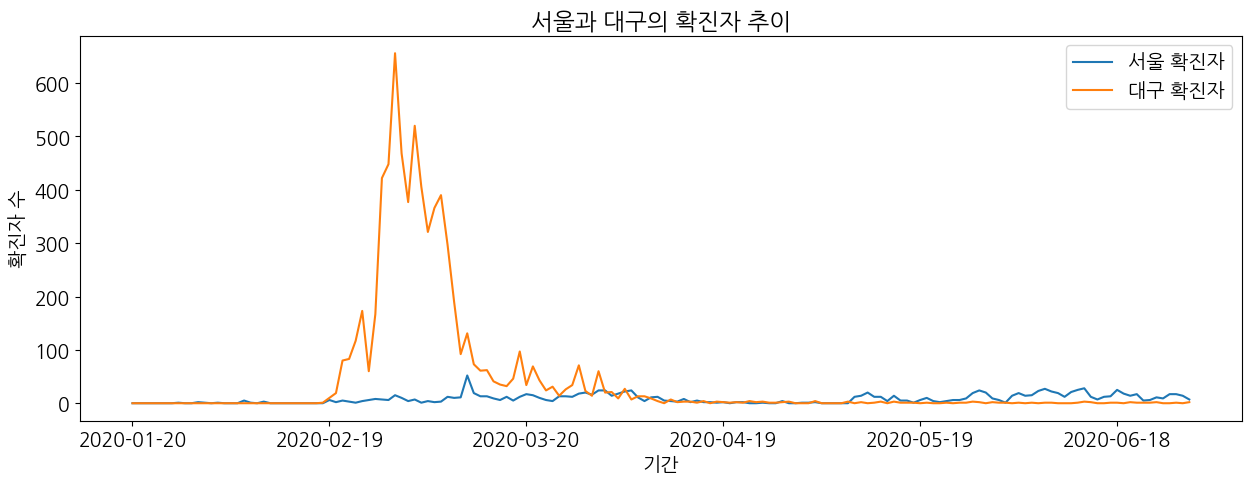

In [20]:
plt.figure(figsize=(15,5))
plt.title('서울과 대구의 확진자 추이')
plt.xlabel('기간')
plt.ylabel('확진자 수')
plt.plot(date_pro, seoul, label='서울 확진자')
plt.plot(date_pro, daegu, label='대구 확진자')
plt.xticks(np.arange(0,162,30))
plt.legend()
plt.show() 